In [ ]:
import copy,math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [ ]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
m = X.shape[0]

indices = np.arange(m)
np.random.shuffle(indices)

train_size = int(0.8 * m) #80-20 ratio

train_idx = indices[:train_size]
test_idx  = indices[train_size:]

#Split data
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (16512, 8) (16512,)
Test shape: (4128, 8) (4128,)


In [ ]:
b_init = 500.25343
w_init = np.random.rand(8)
print(b_init)
print(w_init)
print(w_init.shape)

500.25343
[0.80164289 0.42034813 0.69365233 0.29933191 0.65382631 0.74204068
 0.70021729 0.5588835 ]
(8,)


In [ ]:
def predict(x,w,b):

  res = np.dot(x,w)+b
  return res

In [ ]:
x_vec = X[0,:]
print(f"x_vc {x_vec},value:{x_vec.shape}")

x_vc [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ],value:(8,)


In [ ]:
f_wb = predict(x_vec,w_init,b_init)
print(f"prediction {f_wb},shape {f_wb.shape}") #shape is () because scaler in numpy has no dimensions

prediction 699.9528534924318,shape ()


In [ ]:
def cost(X,y,w,b):

  m = X.shape[0]
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X[i], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost/(2*m)
  return cost

In [ ]:
cost_c = cost(X_train,y_train,w_init,b_init)
print(f"cost is:{cost_c}")

cost is:1266229.9235573446


In [ ]:
def GD(X,y,w,b):

  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] += err * X[i, j] #jth feature of the ith example
      dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_db, dj_dw


In [ ]:
tmp_dj_db, tmp_dj_dw = GD(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 11261.078049357619
dj_dw at initial w,b: 
 [ 5.45446369e+03  3.76367007e+04  7.52455494e+03  1.52266944e+03
  2.84552175e+06  5.12941138e+03  4.99874672e+04 -1.68164598e+05]


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha
"""
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 600
alpha = 5e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,cost, GD,alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
#for i in range(m):
    #print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     2.07   
Iteration   60: Cost     1.23   
Iteration  120: Cost     1.05   
Iteration  180: Cost     0.92   
Iteration  240: Cost     0.83   
Iteration  300: Cost     0.78   
Iteration  360: Cost     0.74   
Iteration  420: Cost     0.71   
Iteration  480: Cost     0.69   
Iteration  540: Cost     0.68   
b,w found by gradient descent: 0.00,[ 0.00086902  0.0038671   0.00074072  0.00011418  0.00011413  0.00012683
  0.00372951 -0.01284989] 


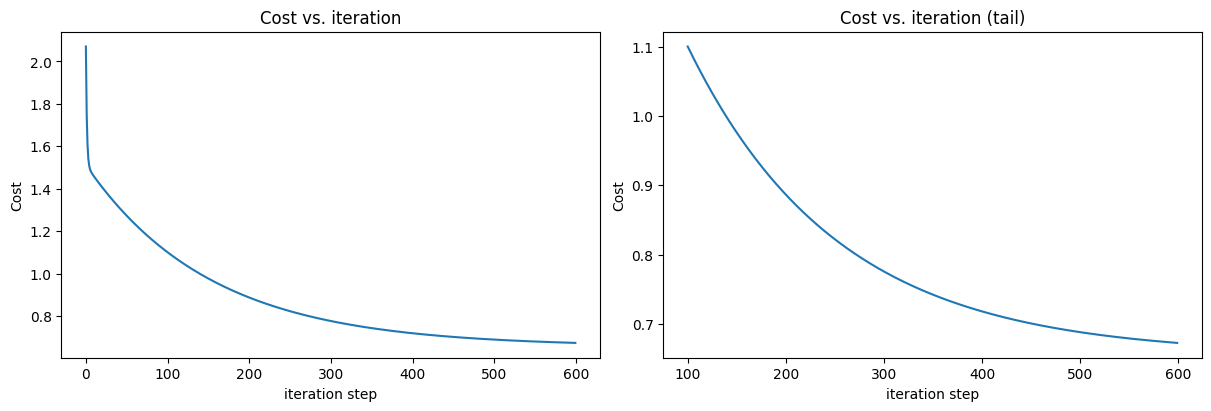

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

y_pred = predict(X_test, w_final, b_final)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation on Test Set ===")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores, rmse_scores, r2_scores = [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_k, X_val_k = X[train_index], X[val_index]
    y_train_k, y_val_k = y[train_index], y[val_index]

    w_k, b_k, _ = gradient_descent(
        X_train_k, y_train_k, np.zeros_like(w_init), 0.,
        cost, GD, alpha, iterations
    )

    y_pred_k = predict(X_val_k, w_k, b_k)

    # Compute metrics
    mse_k = mean_squared_error(y_val_k, y_pred_k)
    rmse_k = np.sqrt(mse_k)
    r2_k = r2_score(y_val_k, y_pred_k)

    mse_scores.append(mse_k)
    rmse_scores.append(rmse_k)
    r2_scores.append(r2_k)

    print(f"\nFold {fold + 1}: MSE={mse_k:.4f}, RMSE={rmse_k:.4f}, R²={r2_k:.4f}")

print("\n=== Cross-Validation Summary ===")
print(f"Average MSE  : {np.mean(mse_scores):.4f}")
print(f"Average RMSE : {np.mean(rmse_scores):.4f}")
print(f"Average R²   : {np.mean(r2_scores):.4f}")



=== Model Evaluation on Test Set ===
MSE  : 1.3842
RMSE : 1.1765
R²   : -0.0185
Iteration    0: Cost     2.12   
Iteration   60: Cost     1.24   
Iteration  120: Cost     1.05   
Iteration  180: Cost     0.92   
Iteration  240: Cost     0.84   
Iteration  300: Cost     0.78   
Iteration  360: Cost     0.74   
Iteration  420: Cost     0.71   
Iteration  480: Cost     0.70   
Iteration  540: Cost     0.68   

Fold 1: MSE=1.3552, RMSE=1.1641, R²=-0.0167
Iteration    0: Cost     2.07   
Iteration   60: Cost     1.23   
Iteration  120: Cost     1.05   
Iteration  180: Cost     0.92   
Iteration  240: Cost     0.84   
Iteration  300: Cost     0.78   
Iteration  360: Cost     0.74   
Iteration  420: Cost     0.71   
Iteration  480: Cost     0.70   
Iteration  540: Cost     0.68   

Fold 2: MSE=1.3591, RMSE=1.1658, R²=-0.0190
Iteration    0: Cost     2.04   
Iteration   60: Cost     1.24   
Iteration  120: Cost     1.05   
Iteration  180: Cost     0.93   
Iteration  240: Cost     0.84   
Iter